#### 이웃 보간법

1. 결측치를 가장 가까운 이웃의 값으로 대체
2. 이산적인 데이터나 이상치에 민감하지 않을 때 주로 활용
3. 추세나 변동성을 파악하는 경우에 사용

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1. 데이터 생성

In [2]:
# 시계열 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=1000, freq='d')
values = np.random.randn(1000)

# 데이터 프레임 생성
data = pd.DataFrame({'Date':dates,'Value':values})

#### 2. 결측치 생성

In [3]:
data.loc[100:200, 'Value'] = np.nan
print(data.loc[100:200])

          Date  Value
100 2023-04-11    NaN
101 2023-04-12    NaN
102 2023-04-13    NaN
103 2023-04-14    NaN
104 2023-04-15    NaN
..         ...    ...
196 2023-07-16    NaN
197 2023-07-17    NaN
198 2023-07-18    NaN
199 2023-07-19    NaN
200 2023-07-20    NaN

[101 rows x 2 columns]


#### 3. 최근접 이웃 보간 적용

In [4]:
# 시계열 데이터 채우기
data['Value_filled'] = data['Value'].interpolate(method='linear')
print(data.loc[100:200],'Value_filled')

# 시계열 데이터 시각화


          Date  Value  Value_filled
100 2023-04-11    NaN     -0.488192
101 2023-04-12    NaN     -0.483050
102 2023-04-13    NaN     -0.477909
103 2023-04-14    NaN     -0.472767
104 2023-04-15    NaN     -0.467626
..         ...    ...           ...
196 2023-07-16    NaN      0.005389
197 2023-07-17    NaN      0.010531
198 2023-07-18    NaN      0.015672
199 2023-07-19    NaN      0.020814
200 2023-07-20    NaN      0.025955

[101 rows x 3 columns] Value_filled


#### 4. 시계열 데이터 시각화

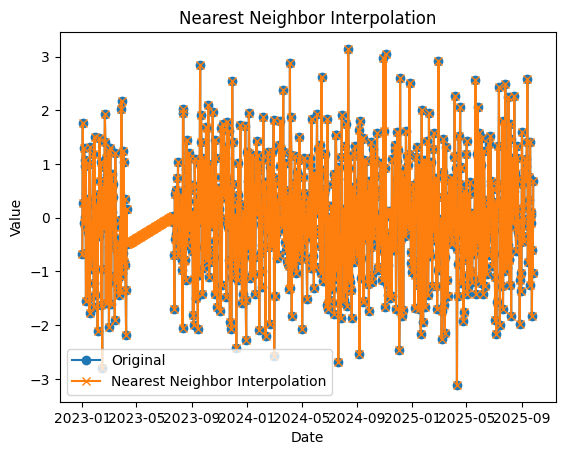

In [5]:
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['Value_filled'], 'x-', label='Nearest Neighbor Interpolation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Nearest Neighbor Interpolation')
plt.legend()
plt.show()